In [ ]:
import pandas as pd
import numpy as np
column_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

data = pd.read_csv('/content/sample_data/USDJPY_H1 (1).csv', header=None, names=column_names)
data=data.dropna()
data=data.drop(['Volume'],axis=1)
data

,Date,Open,High,Low,Close
0,2008-07-16 21:00,105.120,105.125,105.030,105.105
1,2008-07-16 22:00,105.100,105.280,105.090,105.170
2,2008-07-16 23:00,105.170,105.235,105.075,105.090
3,2008-07-17 00:00,105.090,105.120,104.925,105.040
4,2008-07-17 01:00,105.045,105.055,104.750,104.785
...,...,...,...,...,...
97794,2024-08-09 16:00,146.491,146.665,146.477,146.609
97795,2024-08-09 17:00,146.609,146.761,146.598,146.695
97796,2024-08-09 18:00,146.696,146.722,146.593,146.614
97797,2024-08-09 19:00,146.614,146.673,146.556,146.641


In [ ]:
def calculate_features(data):

    # Lag
    data['Lag_1_Close'] = data['Close'].shift(1)
    data['Lag_2_Close'] = data['Close'].shift(2)
    data['Lag_3_Close'] = data['Close'].shift(3)
    data['Lag_4_Close'] = data['Close'].shift(4)
    data['Lag_5_Close'] = data['Close'].shift(5)
    data['Lag_6_Close'] = data['Close'].shift(6)
    data['Lag_7_Close'] = data['Close'].shift(7)
    data['Lag_8_Close'] = data['Close'].shift(8)
    data['Lag_9_Close'] = data['Close'].shift(9)
    data['Lag_10_Close'] = data['Close'].shift(10)


    # MA
    data['MA_20_Close'] = data['Close'].rolling(window=20).mean()
    data['MA_50_Close'] = data['Close'].rolling(window=50).mean()
    data['MA_100_Close'] = data['Close'].rolling(window=100).mean()
    data['MA_200_Close'] = data['Close'].rolling(window=200).mean()


    #EMAs
    data['EMA_5_Close'] = data['Close'].ewm(span=5, adjust=False).mean()
    data['EMA_10_Close'] = data['Close'].ewm(span=10, adjust=False).mean()
    data['EMA_20_Close'] = data['Close'].ewm(span=20, adjust=False).mean()

    #ATR
    data['TR'] = np.maximum((data['High'] - data['Low']),
                            np.maximum(abs(data['High'] - data['Close'].shift(1)),
                                       abs(data['Low'] - data['Close'].shift(1))))
    data['ATR_5'] = data['TR'].rolling(window=5).mean()
    data['ATR_14'] = data['TR'].rolling(window=14).mean()

    # momentum indicators
    data['Momentum_5'] = data['Close'] - data['Close'].shift(5)

    #ROC
    data['ROC_5'] = data['Close'].pct_change(periods=5)
    data['ROC_10'] = data['Close'].pct_change(periods=10)

    # bollinger bands
    data['StdDev_20'] = data['Close'].rolling(window=20).std()
    data['Upper_BB'] = data['MA_20_Close'] + (2 * data['StdDev_20'])
    data['Lower_BB'] = data['MA_20_Close'] - (2 * data['StdDev_20'])
    data['BB_Width'] = data['Upper_BB'] - data['Lower_BB']

    # stochastic oscillator
    data['Lowest_14'] = data['Low'].rolling(window=14).min()
    data['Highest_14'] = data['High'].rolling(window=14).max()
    data['%K_14'] = (data['Close'] - data['Lowest_14']) / (data['Highest_14'] - data['Lowest_14']) * 100
    data['%D_3'] = data['%K_14'].rolling(window=3).mean()

    # MACD
    data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    data['MACD_Histogram'] = data['MACD'] - data['MACD_Signal']
    data = data.dropna()
    return data

In [ ]:
new_df=calculate_features(data)

new_df

,Date,Open,High,Low,Close,Lag_1_Close,Lag_2_Close,Lag_3_Close,Lag_4_Close,Lag_5_Close,...,BB_Width,Lowest_14,Highest_14,%K_14,%D_3,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Histogram
199,2008-07-29 10:00,107.605,107.730,107.580,107.685,107.605,107.670,107.560,107.550,107.420,...,0.395740,107.295,107.730,89.655172,86.383598,107.539121,107.535054,0.004066,-0.030868,0.034934
200,2008-07-29 11:00,107.685,107.870,107.660,107.825,107.685,107.605,107.670,107.560,107.550,...,0.506210,107.295,107.870,92.173913,84.640703,107.583102,107.556532,0.026570,-0.019380,0.045951
201,2008-07-29 12:00,107.825,107.850,107.720,107.775,107.825,107.685,107.605,107.670,107.560,...,0.558768,107.295,107.870,83.478261,88.435782,107.612625,107.572715,0.039910,-0.007522,0.047433
202,2008-07-29 13:00,107.780,107.980,107.775,107.980,107.775,107.825,107.685,107.605,107.670,...,0.696381,107.295,107.980,100.000000,91.884058,107.669144,107.602884,0.066260,0.007234,0.059026
203,2008-07-29 14:00,107.980,108.290,107.980,108.180,107.980,107.775,107.825,107.685,107.605,...,0.901332,107.295,108.290,88.944724,90.807661,107.747737,107.645633,0.102104,0.026208,0.075896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97794,2024-08-09 16:00,146.491,146.665,146.477,146.609,146.495,146.538,146.606,146.777,147.011,...,1.320477,146.267,147.568,26.287471,21.305437,146.834237,146.909989,-0.075751,0.025552,-0.101303
97795,2024-08-09 17:00,146.609,146.761,146.598,146.695,146.609,146.495,146.538,146.606,146.777,...,1.355097,146.267,147.320,40.645774,28.152742,146.812816,146.894064,-0.081247,0.004192,-0.085439
97796,2024-08-09 18:00,146.696,146.722,146.593,146.614,146.695,146.609,146.495,146.538,146.606,...,1.388741,146.267,147.320,32.953466,33.295570,146.782229,146.873318,-0.091089,-0.014864,-0.076225
97797,2024-08-09 19:00,146.614,146.673,146.556,146.641,146.614,146.695,146.609,146.495,146.538,...,1.265831,146.267,147.320,35.517569,36.372270,146.760502,146.856109,-0.095608,-0.031013,-0.064595


In [ ]:
new_df.to_csv('filename.csv', index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
new_df = new_df.drop(['Date'], axis=1)
print(new_df.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]


(97600, 40)


In [ ]:
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

In [ ]:
time_steps = 10
X_train, y_train = create_sequences(train, time_steps)
X_test, y_test = create_sequences(test, time_steps)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))
X_train[0].shape

(10, 39)

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - loss: 0.0046 - val_loss: 9.4597e-04
Epoch 2/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 72s 16ms/step - loss: 1.9338e-04 - val_loss: 5.9398e-04
Epoch 3/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - loss: 1.4684e-04 - val_loss: 2.7044e-04
Epoch 4/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - loss: 1.1642e-04 - val_loss: 1.7859e-04
Epoch 5/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - loss: 1.0724e-04 - val_loss: 2.1135e-04
Epoch 6/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - loss: 9.8332e-05 - val_loss: 2.6933e-04
Epoch 7/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 9.5513e-05 - val_loss: 1.9333e-04
Epoch 8/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - loss: 8.5911e-05 - val_loss: 1.3326e-04
Epoch 9/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 8.2417e-05 - val_loss: 1.6830e-04
Epoch 10/20
2440/2440 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 8.0173e-05 - val_loss: 1.6359e-04
Epoch 11/20
2440/2440 ━

610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Root Mean Squared Error: 0.019133927164768093


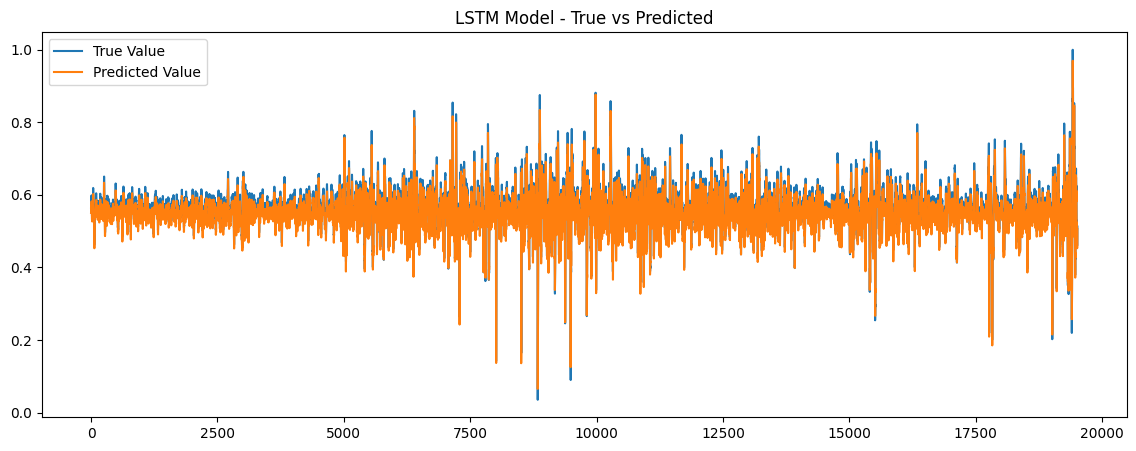

In [ ]:
close_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = close_scaler.fit_transform(y_train.reshape(-1, 1))

predictions = model.predict(X_test)
predictions_inverse = close_scaler.inverse_transform(predictions)


rmse = np.sqrt(mean_squared_error(y_test, predictions_inverse))
print(f'Root Mean Squared Error: {rmse}')

plt.figure(figsize=(14,5))
plt.plot(y_test, label='True Value')
plt.plot(predictions_inverse, label='Predicted Value')
plt.title('LSTM Model - True vs Predicted')
plt.legend()
plt.show()

In [ ]:
model.save('lstm_model.h5')

In [ ]:
def predict_next_close(df, model_path):
    # Calculate features
    df_with_features = calculate_features(df.copy())
    df_with_features = df_with_features.drop(['Close'],axis=1)

    print(df_with_features.iloc[-1,:])

    X = df_with_features.values
    print(X.shape)
    print(X)

    model = load_model(model_path)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    time_steps = 10
    X_input = X_scaled[-time_steps:].reshape(1, time_steps, X_scaled.shape[1])
    print(f'X_input shape: {X_input.shape}')
    close_scaler = MinMaxScaler(feature_range=(0, 1))
    close_scaler.fit(df['Close'].values.reshape(-1, 1))
    predicted_close = model.predict(X_input)
    predicted_close_inverse = close_scaler.inverse_transform(predicted_close)
    return predicted_close_inverse[0][0]

In [ ]:
model = load_model('/content/lstm_model.h5')
close_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = close_scaler.fit_transform(y_train.reshape(-1, 1))
predictions = model.predict(X_test)
predictions_inverse = close_scaler.inverse_transform(predictions)
y_test_reshaped = y_test.reshape(-1, 1)
y_test_inverse = close_scaler.inverse_transform(y_test_reshaped)

for i in range(len(predictions)):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test_inverse[i][0]}")


Streaming output truncated to the last 5000 lines.
Predicted: 0.579460859298706, Actual: 0.5503913625598074
Predicted: 0.5730231404304504, Actual: 0.5473213150121193
Predicted: 0.5662641525268555, Actual: 0.5486013653858793
Predicted: 0.570084810256958, Actual: 0.5486691753383584
Predicted: 0.5694634914398193, Actual: 0.5458002628627703
Predicted: 0.5657855868339539, Actual: 0.5399527724509053
Predicted: 0.5584796667098999, Actual: 0.5397623935347318
Predicted: 0.5622843503952026, Actual: 0.5415018217734643
Predicted: 0.5648448467254639, Actual: 0.535408645738759
Predicted: 0.5541975498199463, Actual: 0.5328905061393783
Predicted: 0.5549691915512085, Actual: 0.5335947401122831
Predicted: 0.5573408007621765, Actual: 0.5381254451960912
Predicted: 0.5631861090660095, Actual: 0.5476460087208351
Predicted: 0.5755354762077332, Actual: 0.5435089639321798
Predicted: 0.5646967887878418, Actual: 0.5450903835194012
Predicted: 0.5673993825912476, Actual: 0.5569689263002094
Predicted: 0.58531373739

Exception ignored in: <function _xla_gc_callback at 0x7dd884c03f40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Predicted: 0.580007791519165, Actual: 0.5581990190932021
Predicted: 0.5789505839347839, Actual: 0.5545837235089973
Predicted: 0.574033260345459, Actual: 0.5503921075156805
Predicted: 0.5682187080383301, Actual: 0.550968517167467
Predicted: 0.5717582106590271, Actual: 0.5532617153821092
Predicted: 0.5750565528869629, Actual: 0.5530969823105708
Predicted: 0.5742150545120239, Actual: 0.5525552633081551
Predicted: 0.5729974508285522, Actual: 0.5505019682757477
Predicted: 0.5702025890350342, Actual: 0.5480669367692246
Predicted: 0.5679585337638855, Actual: 0.5455153423299254
Predicted: 0.565403938293457, Actual: 0.5457780431071323
Predicted: 0.5672087073326111, Actual: 0.5469126592347564
Predicted: 0.5696997046470642, Actual: 0.5480048632720564
Predicted: 0.5697321891784668, Actual: 0.5470756588815573
Predicted: 0.5683406591415405, Actual: 0.5480882053508932
Predicted: 0.5701835751533508, Actual: 0.547975552225605
Predicted: 0.5694906711578369, Actual: 0.5455188910946012
Predicted: 0.565919